<a href="https://colab.research.google.com/github/felipequinto/Series_temporais_TCC/blob/main/Treatment_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
base_2018 = pd.read_excel('2018.xlsx')
base_2019 = pd.read_excel('2019.xlsx')
base_2020 = pd.read_excel('2020.xlsx')

In [ ]:
# Combinando bases
df_orig = pd.concat([base_2018, base_2019, base_2020])

# Converter coluna "Valor Lancto. Contábil" para abs
df_orig['Valor Lancto. Contábil'] = df_orig['Valor Lancto. Contábil'].abs()

# Criando uma cópia do df
df = df_orig.copy()

In [ ]:
# Deletando colunas
indice_col_drop = [0,1,2,5,6,7,9,11]
df = df.drop(df.columns[indice_col_drop], axis =1)

In [ ]:
# Verificando dados faltantes
df.isnull().sum()

,0
Estab.,20
Conta Contábil,20
Data Lançamento,20
Valor Lancto. Contábil,20


In [ ]:
# Deletando dados faltantes
df = df.dropna()

In [ ]:
# Convertendo coluna 'Estab' de float para int
df['Estab.'] = df['Estab.'].astype(int)

In [ ]:
# Formatando data
df.loc[:, 'Data Lançamento'] = pd.to_datetime(df['Data Lançamento'], origin='1899-12-30', unit='D')

<ipython-input-35-cc8eeedc84ef>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2018-01-31 00:00:00', '2018-01-31 00:00:00', '2018-01-31 00:00:00',
 '2018-01-31 00:00:00', '2018-01-31 00:00:00', '2018-01-31 00:00:00',
 '2018-01-31 00:00:00', '2018-01-31 00:00:00', '2018-01-31 00:00:00',
 '2018-01-31 00:00:00',
 ...
 '2020-01-31 00:00:00', '2020-01-31 00:00:00', '2020-02-29 00:00:00',
 '2020-02-29 00:00:00', '2020-02-29 00:00:00', '2020-02-29 00:00:00',
 '2020-02-29 00:00:00', '2020-03-31 00:00:00', '2020-03-31 00:00:00',
 '2020-03-31 00:00:00']
Length: 1228927, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'Data Lançamento'] = pd.to_datetime(df['Data Lançamento'], origin='1899-12-30', unit='D')


In [ ]:
# Criar novas colunas 'Ano' e 'Mes'
df['Ano'] = df['Data Lançamento'].dt.year
df['Mês'] = df['Data Lançamento'].dt.month


In [ ]:
# Criar pivot table
df_new = df.pivot_table(index=['Ano', 'Mês'], columns='Conta Contábil', values='Valor Lancto. Contábil', aggfunc='sum').reset_index()

In [ ]:
df_new.head(2)

Conta Contábil,Ano,Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,311110110,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
0,2018,1,5906414.43,50696.18,3168486.01,6458.9,583325.63,82950.58,881.31,2.12,...,643303.97,NaN,42021.0,397621.11,436.13,18669.0,12828.98,NaN,NaN,NaN
1,2018,2,6315178.74,60144.70,730433.51,9227.0,559751.51,30982.78,2487.57,63.58,...,1321919.90,NaN,221.0,3049390.18,627.19,NaN,26629.37,NaN,NaN,NaN


In [ ]:
# Substituindo valores NaN
df_new = df_new.fillna(0)

In [ ]:
# Verificando se ainda existe valores NaN
df.isna().sum()

,0
Estab.,0
Conta Contábil,0
Data Lançamento,0
Valor Lancto. Contábil,0
Ano,0
Mês,0


In [ ]:
df.head()

,Estab.,Conta Contábil,Data Lançamento,Valor Lancto. Contábil,Ano,Mês
0,1,311110101,2018-01-31,98293.80,2018,1
1,1,311110101,2018-01-31,21045.60,2018,1
2,1,311110101,2018-01-31,8280.00,2018,1
3,1,311110101,2018-01-31,857.81,2018,1
4,1,311110101,2018-01-31,14822.65,2018,1


In [ ]:
# Calcular o total de cada mês por ano
totals = df.groupby(['Ano', 'Mês'])['Valor Lancto. Contábil'].sum().reset_index()

# Renomear a coluna de soma para 'Total Mês'
totals = totals.rename(columns={'Valor Lancto. Contábil': 'Total Mês'})

# Mesclar os totais calculados com o DataFrame original
df_new = df_new.merge(totals, on=['Ano', 'Mês'], how='left')

# Reorganizar as colunas para que 'Total Mês' esteja no índice 2
cols = list(df_new.columns)
cols.insert(2, cols.pop(cols.index('Total Mês')))
df_new = df_new[cols]


In [ ]:
df_new.head(20)

,Ano,Mês,Total Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
0,2018,1,5.374127e+07,5906414.43,50696.18,3168486.01,6458.90,583325.63,82950.58,881.31,...,643303.97,0.0,42021.00,397621.11,436.13,18669.00,12828.98,0.00,0.00,0.0
1,2018,2,6.643437e+07,6315178.74,60144.70,730433.51,9227.00,559751.51,30982.78,2487.57,...,1321919.90,0.0,221.00,3049390.18,627.19,0.00,26629.37,0.00,0.00,0.0
2,2018,3,9.245592e+07,6328579.51,59968.33,978174.27,9227.00,625780.82,53689.57,3149.16,...,2133666.55,0.0,90120.00,1988535.08,100.80,23336.04,13739.47,8878.77,0.00,0.0
3,2018,4,1.716713e+08,6543779.23,60494.86,853728.88,0.00,598860.32,35190.27,3244.84,...,567036.15,0.0,1285864.36,6125397.66,5048.27,1555.68,65466.50,0.00,0.00,0.0
4,2018,5,6.793400e+07,7106888.05,63273.68,1057232.06,0.00,701784.14,40353.27,3235.61,...,774500.00,0.0,69562.00,8107928.05,6762.80,1555.68,0.00,0.00,0.00,0.0
5,2018,6,5.675096e+07,7562248.41,66838.17,1024145.87,0.00,715476.14,55489.98,3267.17,...,1357238.80,7500.0,134404.33,1900243.22,892.14,1555.68,0.00,1863.42,0.00,0.0
6,2018,7,1.562841e+08,7826779.65,66925.46,1347179.06,0.00,766449.15,71754.92,3349.36,...,1649248.85,15074.0,172984.10,3408871.04,141.92,1555.68,0.00,2348935.28,0.00,0.0
7,2018,8,1.900463e+08,8436328.36,77597.98,1054012.80,0.00,843776.25,43423.31,3294.61,...,2060000.00,14706.0,135224.00,7576595.32,941.52,1555.68,0.00,4318923.91,0.00,0.0
8,2018,9,1.123586e+08,8692363.80,78810.25,1134307.68,0.00,817661.50,43682.23,3349.36,...,2929559.66,720.0,868059.75,4968021.65,1370.79,1555.68,0.00,3362030.42,0.00,0.0
9,2018,10,1.159259e+08,9039689.52,81174.59,1219654.46,13869.46,846924.82,44183.26,3338.58,...,4032000.00,0.0,412451.44,6637561.92,448.69,1555.68,0.00,159041.94,187417.20,0.0


In [ ]:
# Mes/Ano do valor outlier detectado
df_new.loc[(df_new["Ano"] == 2018) & (df_new["Mês"] == 12)]

,Ano,Mês,Total Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
11,2018,12,1.071941e+09,9079229.89,73200.38,1376851.8,19026.06,23464837.57,55732.26,3349.36,...,4004140.09,0.0,1390921.0,18095820.84,522.86,3111.36,0.0,1942.27,388704.14,0.0


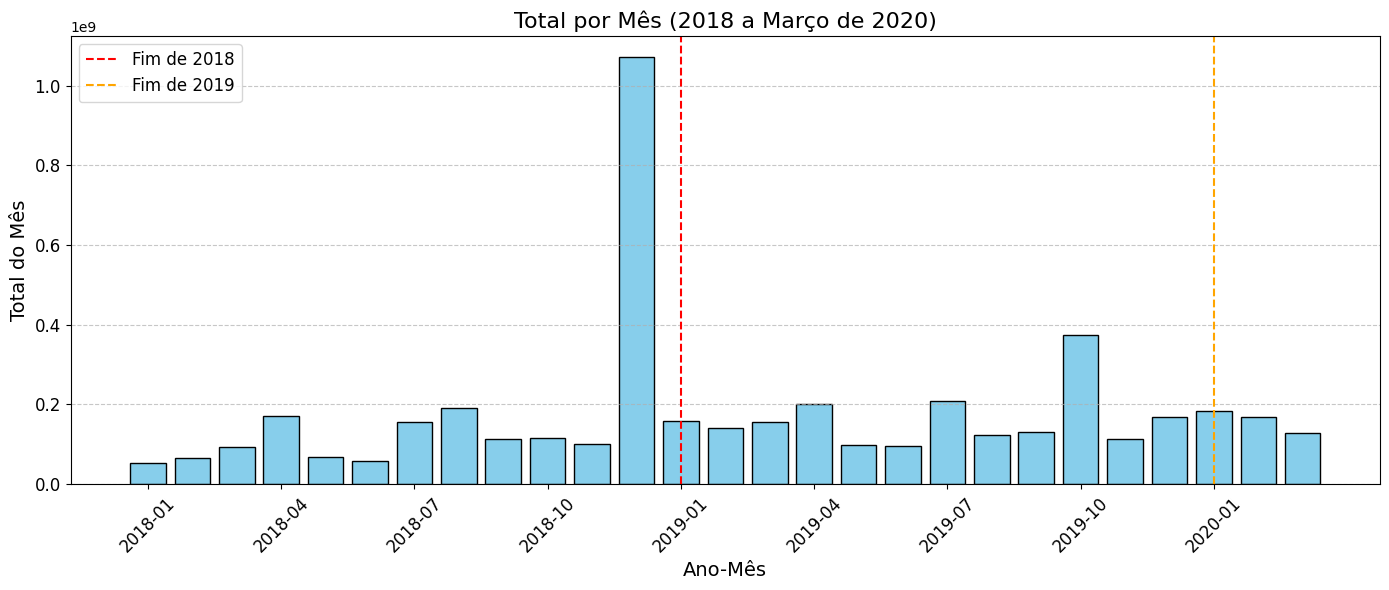

In [ ]:
import matplotlib.pyplot as plt

# Adiciona uma coluna de Ano e Mês combinados para o eixo X
df_new['Ano_Mês'] = df_new['Ano'].astype(str) + '-' + df_new['Mês'].astype(str).str.zfill(2)

# Ordena os dados pela nova coluna
df_new = df_new.sort_values(by='Ano_Mês')

# Gráfico de Colunas
plt.figure(figsize=(14, 6))
plt.bar(df_new['Ano_Mês'], df_new['Total Mês'], color='skyblue', edgecolor='black')
plt.axvline(len(df_new[df_new['Ano'] == 2018]), color='red', linestyle='--', label='Fim de 2018')
plt.axvline(len(df_new[df_new['Ano'] <= 2019]), color='orange', linestyle='--', label='Fim de 2019')
plt.title('Total por Mês (2018 a Março de 2020)', fontsize=16)
plt.xlabel('Ano-Mês', fontsize=14)
plt.ylabel('Total do Mês', fontsize=14)
plt.xticks(range(0, len(df_new), 3), df_new['Ano_Mês'][::3], rotation=45, fontsize=12)  # Exibir rótulos a cada 3 meses
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Extrair a ref da linha do outlier
df_new.loc[(df_new["Ano"] == 2018) & (df_new["Mês"] == 12)]

,Ano,Mês,Total Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
11,2018,12,1.071941e+09,9079229.89,73200.38,1376851.8,19026.06,23464837.57,55732.26,3349.36,...,4004140.09,0.0,1390921.0,18095820.84,522.86,3111.36,0.0,1942.27,388704.14,0.0


In [ ]:
# Realizar a substituição do dado a partir do maior + 5%
df_new.iloc[11,2:] = (df_new.loc[(df_new["Ano"] == 2019) & (df_new["Mês"] == 10)] * 1.05).iloc[:,2:]

In [ ]:
# Checagem valor se foi alterado
df_new.loc[(df_new["Ano"] == 2018) & (df_new["Mês"] == 12)]

,Ano,Mês,Total Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
11,2018,12,3.920833e+08,1.030429e+07,83909.616,1343934.963,41620.089,944803.293,58377.585,11399.01,...,4338600.0,820154.475,97294.9215,8205352.029,19958.631,1633.464,0.0,35823.249,43575.0,1102.5


In [ ]:
(df_new.loc[(df_new["Ano"] == 2019) & (df_new["Mês"] == 10)] * 1.05).iloc[:,2:]

,Total Mês,311110101,311110103,311110105,311110106,311110107,311110108,311110109,311110110,311110113,...,3322101AC,3322101AD,3322101AE,3322101AF,3322101AG,3322101AL,3322101AM,3322101AN,3322101AO,3322101AP
21,3.920833e+08,1.030429e+07,83909.616,1343934.963,41620.089,944803.293,58377.585,11399.01,72.8175,128364.6525,...,4338600.0,820154.475,97294.9215,8205352.029,19958.631,1633.464,0.0,35823.249,43575.0,1102.5


Base após tratamento do outlier

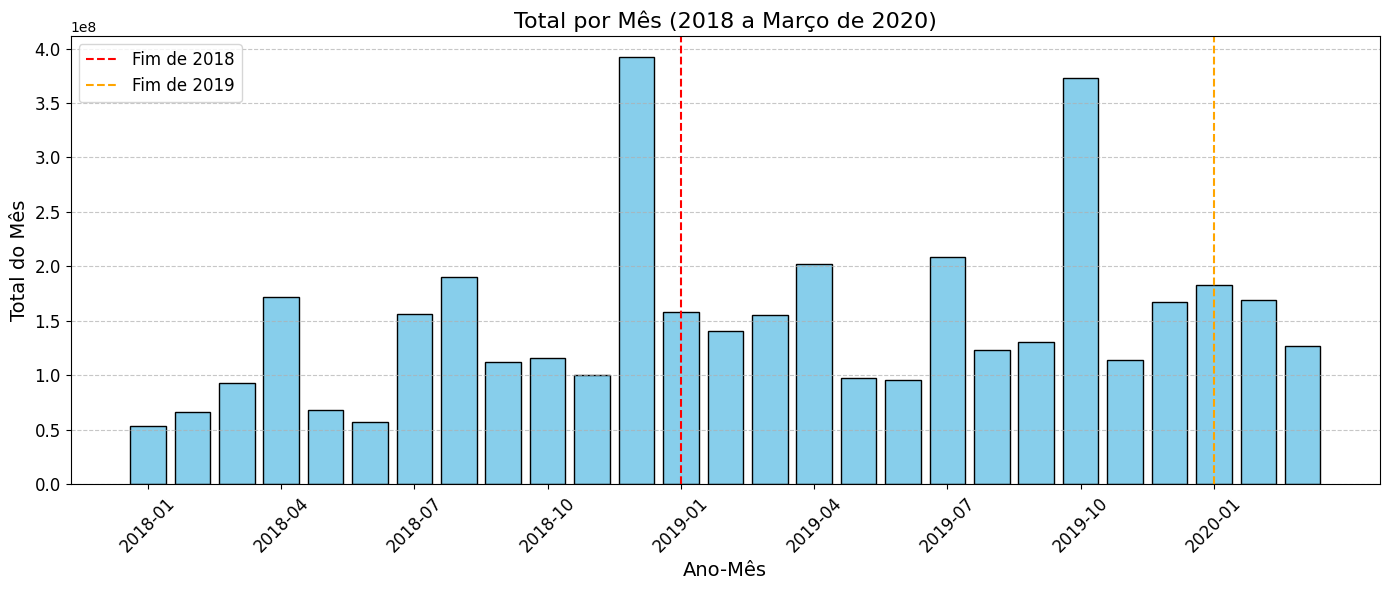

In [ ]:
# Adiciona uma coluna de Ano e Mês combinados para o eixo X
df_new['Ano_Mês'] = df_new['Ano'].astype(str) + '-' + df_new['Mês'].astype(str).str.zfill(2)

# Ordena os dados pela nova coluna
df_new = df_new.sort_values(by='Ano_Mês')

# Gráfico de Colunas
plt.figure(figsize=(14, 6))
plt.bar(df_new['Ano_Mês'], df_new['Total Mês'], color='skyblue', edgecolor='black')
plt.axvline(len(df_new[df_new['Ano'] == 2018]), color='red', linestyle='--', label='Fim de 2018')
plt.axvline(len(df_new[df_new['Ano'] <= 2019]), color='orange', linestyle='--', label='Fim de 2019')
plt.title('Total por Mês (2018 a Março de 2020)', fontsize=16)
plt.xlabel('Ano-Mês', fontsize=14)
plt.ylabel('Total do Mês', fontsize=14)
plt.xticks(range(0, len(df_new), 3), df_new['Ano_Mês'][::3], rotation=45, fontsize=12)  # Exibir rótulos a cada 3 meses
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
